# 단순 선형 회귀

In [220]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 선형회귀 알고리즘
from sklearn.linear_model import LinearRegression

In [221]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [223]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

In [224]:
df = df.dropna()

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           396 non-null    float64
 1   cylinders     396 non-null    int64  
 2   displacement  396 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        396 non-null    int64  
 5   acceleration  396 non-null    float64
 6   model-year    396 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.8 KB


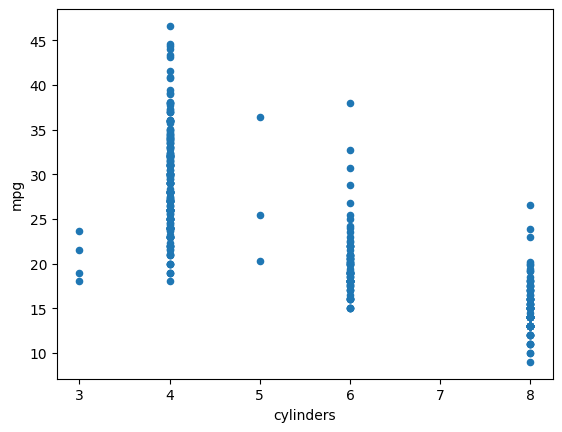

In [226]:
df.plot(kind = 'scatter', x = 'cylinders', y = 'mpg')
plt.show()

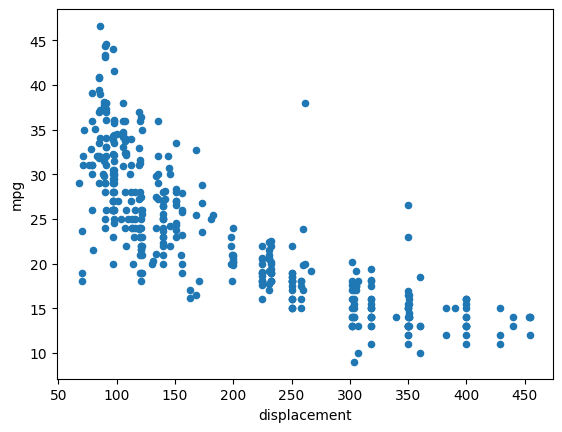

In [227]:
df.plot(kind = 'scatter', x = 'displacement', y = 'mpg')
plt.show()

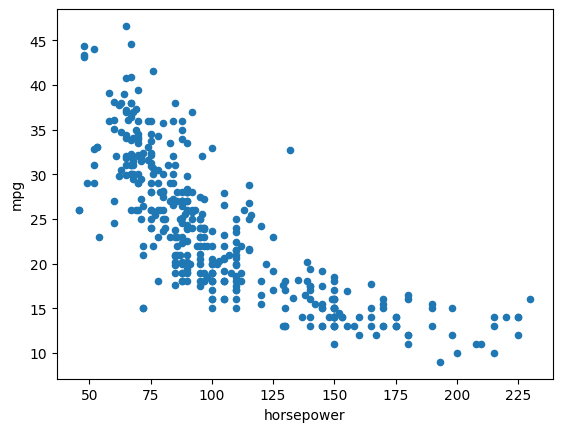

In [228]:
df.plot(kind = 'scatter', x = 'horsepower', y = 'mpg')
plt.show()

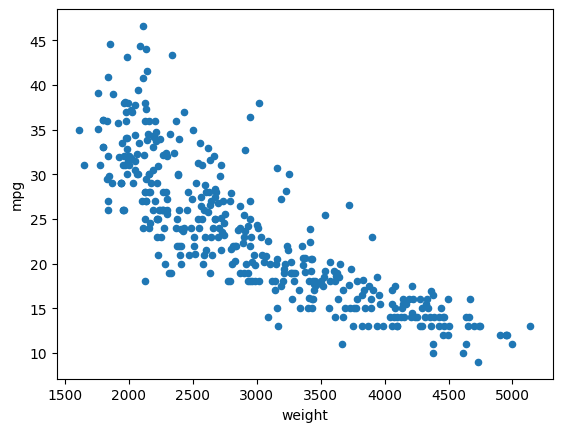

In [229]:
df.plot(kind = 'scatter', x = 'weight', y = 'mpg')
plt.show()

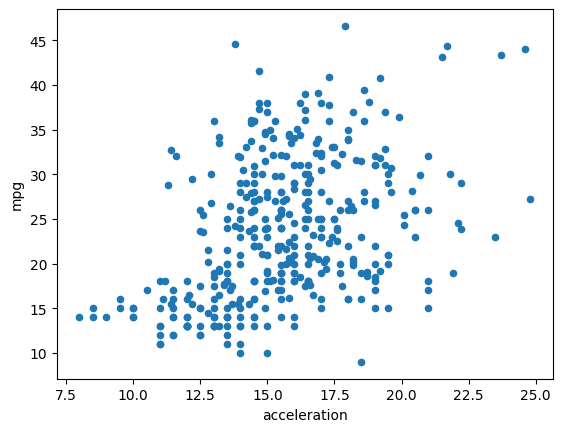

In [230]:
df.plot(kind = 'scatter', x = 'acceleration', y = 'mpg')
plt.show()

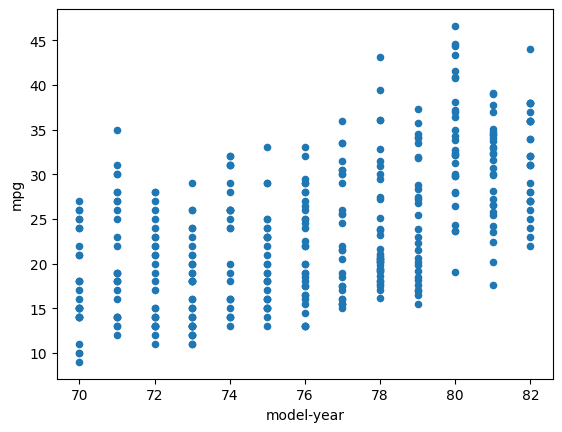

In [231]:
df.plot(kind = 'scatter', x = 'model-year', y = 'mpg')
plt.show()

In [243]:
corr = df.corr(method='pearson')
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
mpg,1.000000,-0.775680,-0.804711,-0.777575,-0.832725,0.421159,0.581144
cylinders,-0.775680,1.000000,0.950706,0.843751,0.896058,-0.504844,-0.352554
displacement,-0.804711,0.950706,1.000000,0.897787,0.932729,-0.542713,-0.374620
horsepower,-0.777575,0.843751,0.897787,1.000000,0.864350,-0.687241,-0.420697
weight,-0.832725,0.896058,0.932729,0.864350,1.000000,-0.415462,-0.311774
acceleration,0.421159,-0.504844,-0.542713,-0.687241,-0.415462,1.000000,0.294588
model-year,0.581144,-0.352554,-0.374620,-0.420697,-0.311774,0.294588,1.000000


### 데이터셋 준비

In [232]:
# 단순선형회귀 : 독립변수가 1개
X = df[['weight']]
y = df['mpg']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

(316, 1) (80, 1) (316,) (80,)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [234]:
# y = ax + b
print("기울기 a : ", model.coef_)
print("y절편 b : ", model.intercept_)

기울기 a :  [-0.00765215]
y절편 b :  46.21799192546902


In [235]:
pred = model.predict(X_test)
pred

array([29.45979401, 22.03721319, 28.38849368, 16.37462577, 23.79720658,
       26.4601531 , 23.6824244 , 20.2083505 , 32.17630554, 30.3397907 ,
       25.77146003, 31.29630885, 19.20591948, 22.33564685, 13.35202842,
       12.90055186, 14.01011291, 19.82574324, 23.77425014, 31.06674449,
       17.67549044, 18.57079143, 23.38399074, 24.79198545, 11.76803437,
       22.96312276, 13.51272347, 25.82502505, 26.53667455, 12.05881589,
       16.98679738, 31.18152667, 12.35724955, 29.72761909,  7.98022252,
       29.68935836, 19.90226469, 21.05773861, 16.60419012, 20.69043564,
       25.60311284, 20.00939472, 16.06853996, 20.46852343, 12.70159608,
       28.61805804, 29.26849038, 14.43098089, 31.29630885, 29.95718344,
       21.10365148, 15.02019607, 18.51722641, 31.25804812, 12.83168255,
       23.59059866, 26.43719666, 23.16973068, 10.76560336, 29.03892602,
       31.02848376, 32.44413062, 14.53045878, 21.64695379, 27.79162636,
       12.38020599, 16.32106075, 31.02848376, 15.95375778, 29.81

### 성능평가

1. 평균 제곱 오차 (Mean Squared Error, MSE)
  - 정의: 예측값과 실제값의 차이를 제곱하여 평균한 값.
  - 좋은 기준: MSE 값은 데이터의 스케일에 따라 다르므로, 일반적으로는 특정 기준을 정하기 어렵습니다. 그러나 MSE가 작을수록 좋은 성능으로 간주됩니다.

2. 평균 절대 오차 (Mean Absolute Error, MAE)
  - 정의: 예측값과 실제값의 차이의 절대값을 평균한 값.
  - 좋은 기준: MAE 또한 데이터의 스케일에 따라 다르지만, MSE보다 해석이 직관적입니다. 예를 들어, 예측값의 범위가 0에서 100이라면, 5 이하의 MAE는 좋은 성능으로 평가될 수 있습니다.

3. 결정 계수 (R² 또는 R-squared)
  - 정의: 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 비율. 1에 가까울수록 모델이 실제 데이터를 잘 설명합니다.
  - 좋은 기준: R² 값이 0.7 이상이면 보통 좋은 성능으로 간주됩니다. 0.5 이상이면 수용 가능한 성능으로 볼 수 있습니다.

In [236]:
# 결정계수
from sklearn.metrics import r2_score

score = r2_score(y_test,pred)
print(score)


0.7430322078238181


In [237]:
pred = model.predict([[1000]])
print(pred)

[38.56584676]


c:\Temp\2025\venv310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 다중선형회귀 : 독립변수가 여러개
X = df[['weight','horsepower','displacement']]
y = df['mpg']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

(316, 3) (80, 3) (316,) (80,)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# y = ax + bs + cx + d
print("기울기 a,b,c : ", model.coef_)
print("y절편 d : ", model.intercept_)

기울기 a :  [-0.00555714 -0.04531118 -0.00419035]
y절편 b :  45.71208142435472


In [ ]:
pred = model.predict(X_test)
pred

array([29.45979401, 22.03721319, 28.38849368, 16.37462577, 23.79720658,
       26.4601531 , 23.6824244 , 20.2083505 , 32.17630554, 30.3397907 ,
       25.77146003, 31.29630885, 19.20591948, 22.33564685, 13.35202842,
       12.90055186, 14.01011291, 19.82574324, 23.77425014, 31.06674449,
       17.67549044, 18.57079143, 23.38399074, 24.79198545, 11.76803437,
       22.96312276, 13.51272347, 25.82502505, 26.53667455, 12.05881589,
       16.98679738, 31.18152667, 12.35724955, 29.72761909,  7.98022252,
       29.68935836, 19.90226469, 21.05773861, 16.60419012, 20.69043564,
       25.60311284, 20.00939472, 16.06853996, 20.46852343, 12.70159608,
       28.61805804, 29.26849038, 14.43098089, 31.29630885, 29.95718344,
       21.10365148, 15.02019607, 18.51722641, 31.25804812, 12.83168255,
       23.59059866, 26.43719666, 23.16973068, 10.76560336, 29.03892602,
       31.02848376, 32.44413062, 14.53045878, 21.64695379, 27.79162636,
       12.38020599, 16.32106075, 31.02848376, 15.95375778, 29.81